<a href="https://colab.research.google.com/github/konrad-l/roughness_prediction/blob/main/Model_calculation_Ra_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

tf.__version__

'2.12.0'

In [ ]:
df_raw = pd.read_excel('Ra_CNC.xlsx')
df = df_raw.copy()

In [ ]:
df.head()

,α [°],θ [°],Vu [mm/s],δ [-],Fx [kN],Fr [kN],M [Nm],Wz [μm],Ra [μm],Rz [μm]
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   α [°]      81 non-null     int64  
 1   θ [°]      81 non-null     float64
 2   Vu [mm/s]  81 non-null     int64  
 3   δ [-]      81 non-null     float64
 4   Fx [kN]    70 non-null     float64
 5   Fr [kN]    70 non-null     float64
 6   M [Nm]     70 non-null     float64
 7   Wz [μm]    70 non-null     float64
 8   Ra [μm]    70 non-null     float64
 9   Rz [μm]    70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.5 KB


In [ ]:
df.columns = ['alfa', 'tetha', 'Vu', 'gniot', 'Fx', 'Fr', 'M', 'Wz', 'Ra', 'Rz']
df.head()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [ ]:
df.loc[:, ['Ra', 'Rz']].isnull().sum()

Ra    11
Rz    11
dtype: int64

In [ ]:
df[(df['Ra'].isnull()) & (df['Rz'].isnull())]

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
6,15,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
7,15,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
8,15,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
24,25,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
25,25,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
26,25,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
54,15,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN
56,15,7.5,10,1.53,NaN,NaN,NaN,NaN,NaN,NaN
63,20,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna().reset_index(drop=True)
df = df.round(2)
df

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.81,34.81,360.84,123.5,16.58,86.28
1,15,2.5,10,1.30,4.50,46.91,487.34,48.3,4.33,37.63
2,15,2.5,10,1.53,9.20,49.44,519.86,45.1,3.72,32.56
3,15,2.5,20,1.13,2.95,28.16,396.28,118.7,15.63,86.73
4,15,2.5,20,1.30,9.93,42.39,600.23,52.6,4.48,34.46
...,...,...,...,...,...,...,...,...,...,...
65,25,7.5,20,1.30,0.84,32.88,701.94,125.1,9.40,72.50
66,25,7.5,20,1.53,12.34,38.16,786.54,199.6,8.20,41.73
67,25,7.5,40,1.13,3.84,26.14,589.82,280.1,24.10,141.70
68,25,7.5,40,1.30,9.26,38.16,932.41,113.3,6.90,54.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   alfa    70 non-null     int64  
 1   tetha   70 non-null     float64
 2   Vu      70 non-null     int64  
 3   gniot   70 non-null     float64
 4   Fx      70 non-null     float64
 5   Fr      70 non-null     float64
 6   M       70 non-null     float64
 7   Wz      70 non-null     float64
 8   Ra      70 non-null     float64
 9   Rz      70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.6 KB


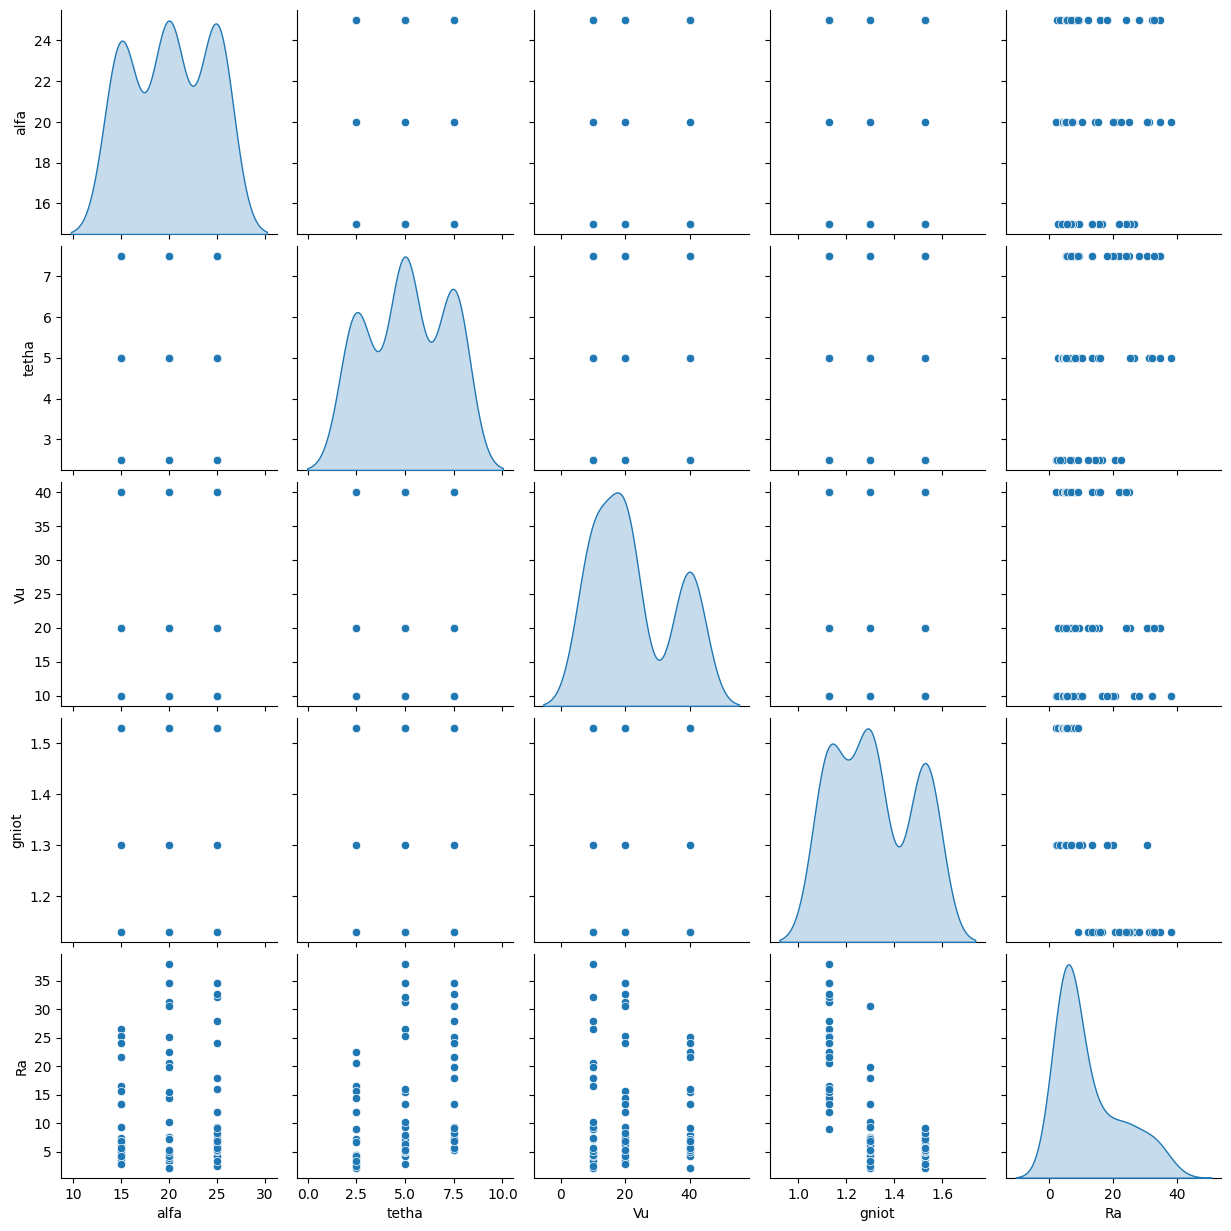

In [ ]:
sns.pairplot(df[['alfa', 'tetha', 'Vu', 'gniot', 'Ra']], diag_kind='kde')

In [ ]:
px.histogram(df, 'Ra')

In [ ]:
df = df.drop(['Fx','Fr', 'M', 'Wz', 'Rz'], axis=1)
df.head()

,alfa,tetha,Vu,gniot,Ra
0,15,2.5,10,1.13,16.58
1,15,2.5,10,1.30,4.33
2,15,2.5,10,1.53,3.72
3,15,2.5,20,1.13,15.63
4,15,2.5,20,1.30,4.48


**Przygotowanie danych**

In [ ]:
# podział danych
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
# podział na etykiety i zmienne wejściowe
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Ra')
test_labels = test_features.pop('Ra')

In [ ]:
px.scatter_matrix(train_dataset, dimensions=['alfa', 'tetha', 'Vu', 'gniot', 'Ra'], color='Ra', height=700)

**Standaryzacja danych**

In [ ]:
# stworzenie warstwy
normalizer = tf.keras.layers.Normalization(axis=-1)

# dopasowanie/ fit warstwy
normalizer.adapt(np.array(train_features))

# obliczanie średniej i wariancji i umieszczenie jej w warstwie
print(normalizer.mean.numpy())

[[20.267857   5.1339283 22.67857    1.347857 ]]


In [ ]:
# przedstawi znormalizowane dane
# print(normalizer(test_features).numpy())

In [ ]:
# przykładowe wywołanie
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[15.    5.   40.    1.13]]

Normalized: [[-1.3  -0.07  1.48 -1.36]]


**Keras**

In [ ]:
train_features.keys()

Index(['alfa', 'tetha', 'Vu', 'gniot'], dtype='object')

In [ ]:
def build_model():
  model = Sequential(normalizer)
  model.add(Dense(512, kernel_regularizer='l2', activation='relu', input_shape=[len(train_features.keys())]))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
# oryginał:
#1024
#512
#128

In [ ]:
model = build_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_52 (Dense)            (None, 512)               2560      
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 1)                 129       
                                                                 
Total params: 166,922
Trainable params: 166,913
Non-trainable params: 9
_______________________________________________

In [ ]:
history = model.fit(train_features, train_labels, epochs=150, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/150
5/5 [==============================] - 1s 59ms/step - loss: 223.7668 - mae: 11.4047 - mse: 223.6872 - val_loss: 78.5115 - val_mae: 6.2601 - val_mse: 78.4310
Epoch 2/150
5/5 [==============================] - 0s 14ms/step - loss: 190.5463 - mae: 9.8830 - mse: 190.4648 - val_loss: 54.2146 - val_mae: 4.4733 - val_mse: 54.1307
Epoch 3/150
5/5 [==============================] - 0s 14ms/step - loss: 146.2029 - mae: 7.6384 - mse: 146.1173 - val_loss: 32.5828 - val_mae: 3.7180 - val_mse: 32.4942
Epoch 4/150
5/5 [==============================] - 0s 18ms/step - loss: 87.2690 - mae: 5.9162 - mse: 87.1794 - val_loss: 33.0733 - val_mae: 5.0314 - val_mse: 32.9815
Epoch 5/150
5/5 [==============================] - 0s 15ms/step - loss: 78.5863 - mae: 6.8322 - mse: 78.4939 - val_loss: 42.5834 - val_mae: 6.1108 - val_mse: 42.4906
Epoch 6/150
5/5 [==============================] - 0s 20ms/step - loss: 62.5788 - mae: 6.6121 - mse: 62.4865 - val_loss: 23.8674 - val_mae: 4.1565 - val_mse: 23.77

In [ ]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist['rmse'] = np.sqrt(hist['mse'])
    hist['val_rmse'] = np.sqrt(hist['val_mse'])

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['mae'], name='mae', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_mae'], name='val_mae', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='MAE vs. VAL_MAE', xaxis_title='Epoki', yaxis_title='Mean Absolute Error', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['rmse'], name='rmse', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_rmse'], name='val_rmse', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='RMSE vs. VAL_RMSE', xaxis_title='Epoki', yaxis_title='Root Mean Squared Error', yaxis_type='log')
    fig.show()

plot_hist(history)

In [ ]:
for name, value in zip(model.metrics_names, model.evaluate(test_features, test_labels)):
  print(f'{name:8}{value:.4f}')

1/1 [==============================] - 0s 32ms/step - loss: 44.7624 - mae: 4.8302 - mse: 44.6451
loss    44.7624
mae     4.8302
mse     44.6451


In [ ]:
test_predictions = model.predict(test_features).flatten()
test_predictions

1/1 [==============================] - 0s 87ms/step


array([ 5.164261 , 18.196705 , 16.752449 , 14.16022  ,  9.187398 ,
       18.032717 ,  5.3742747,  5.20892  , 28.839527 , 17.91706  ,
       16.897303 , 21.885775 , 43.309708 , 44.339188 ], dtype=float32)

In [ ]:
pred = pd.DataFrame(test_labels)
pred['predictions'] = test_predictions
pred.head()

,Ra,predictions
1,4.33,5.164261
6,20.54,18.196705
9,14.40,16.752449
12,22.53,14.160220
21,9.26,9.187398


In [ ]:
fig = px.scatter(pred, 'Ra', 'predictions')
fig.add_trace(go.Scatter(x=[0, 50], y=[0,50], mode='lines'))
fig.show()

In [ ]:
pred['error'] = pred['Ra'] - pred['predictions']
pred.head()

,Ra,predictions,error
1,4.33,5.164261,-0.834261
6,20.54,18.196705,2.343295
9,14.40,16.752449,-2.352449
12,22.53,14.160220,8.369780
21,9.26,9.187398,0.072602


In [ ]:
px.histogram(pred, 'error', marginal='rug', width=1000)

In [ ]:
np.arange(1, 50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, 50), y=pred['Ra'], name='Ra', mode='markers+lines'))
fig.add_trace(go.Scatter(x=np.arange(1, 50), y=pred['predictions'], name='predicted Ra', mode='markers+lines'))
fig.update_layout(width=1000, height=500, title='Roughness', xaxis_title='No samples', yaxis_title='Ra value')
fig.show()

In [ ]:
from sklearn.metrics import r2_score
# MAE - błąd średni bezwzględny
from sklearn.metrics import mean_absolute_error
# MSE - błąd średniokwadratowy
from sklearn.metrics import mean_squared_error
# Max Error - błąd maksymalny
from sklearn.metrics import max_error

In [ ]:
print(f'MAE: {mean_absolute_error(test_labels, test_predictions):.2f}')
print(f'MSE: {mean_squared_error(test_labels, test_predictions):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_labels, test_predictions)):.2f}')
print(f'Max Error: {max_error(test_labels, test_predictions):.2f}')
print(f'R2_score: {r2_score(test_labels, test_predictions):.2f}')

MAE: 4.83
MSE: 44.65
RMSE: 6.68
Max Error: 15.38
R2_score: 0.53


**Predykcja oś kolejowa**

In [ ]:
rail = {'alfa': [20, 20, 20, 20, 20],
        'tetha': [5, 5, 5, 5, 5],
        'Vu': [15, 15, 20, 15, 15],
        'gniot': [1.48, 1.05, 1.21, 1.05, 1.48],
        'Ra': [5.3, 25.9, 20.1, 26.9, 4.1]}

df_rail = pd.DataFrame(rail)
df_rail

,alfa,tetha,Vu,gniot,Ra
0,20,5,15,1.48,5.3
1,20,5,15,1.05,25.9
2,20,5,20,1.21,20.1
3,20,5,15,1.05,26.9
4,20,5,15,1.48,4.1


In [ ]:
# podział na etykiety i dane

rail_test_features = df_rail.copy()

rail_test_labels = rail_test_features.pop('Ra')

In [ ]:
for name, value in zip(model.metrics_names, model.evaluate(rail_test_features, rail_test_labels)):
  print(f'{name:8}{value:.4f}')

1/1 [==============================] - 0s 30ms/step - loss: 108.9390 - mae: 7.3686 - mse: 108.8084
loss    108.9390
mae     7.3686
mse     108.8084


In [ ]:
rail_predictions = model.predict(rail_test_features).flatten()
rail_predictions

1/1 [==============================] - 0s 26ms/step


array([ 3.5737083, 42.7856   , 21.91914  , 42.7856   ,  3.5737083],
      dtype=float32)

In [ ]:
rail_pred = pd.DataFrame(rail_test_labels)
rail_pred['rail_predictions'] = rail_predictions
rail_pred.head()

,Ra,rail_predictions
0,5.3,3.573708
1,25.9,42.785599
2,20.1,21.919140
3,26.9,42.785599
4,4.1,3.573708


In [ ]:
fig = px.scatter(rail_pred, 'Ra', 'rail_predictions')
fig.add_trace(go.Scatter(x=[0, 50], y=[0,50], mode='lines'))
fig.show()

In [ ]:
rail_pred['error'] = rail_pred['Ra'] - rail_pred['rail_predictions']
rail_pred.head()

,Ra,rail_predictions,error
0,5.3,3.573708,1.726292
1,25.9,42.785599,-16.885599
2,20.1,21.919140,-1.819140
3,26.9,42.785599,-15.885599
4,4.1,3.573708,0.526292
